In [76]:
import geopandas as gpd
import osmnx as ox
from shapely.geometry import Polygon
import folium
import pandas as pd

In [48]:
max_x = -78.6
min_x = -78.65
max_y = 35.8
min_y = 35.75

bbox = Polygon([[max_x, max_y],[min_x, max_y], [min_x, min_y],[max_x, min_y]])

In [157]:
buildings = gpd.read_file("./data/Building_Footprints.geojson")
evse = gpd.read_file("./data/EVSE_Stations.geojson")
bus_stops = gpd.read_file("./data/GoRaleigh_Bus_Stops.geojson")
police_incidents = gpd.read_file("./data/Raleigh_Police_Incidents_(SRS).geojson")

In [158]:
buildings = buildings[(buildings.geometry.centroid.x<max_x)&(buildings.geometry.centroid.x>min_x)&(buildings.geometry.centroid.y<max_y)&(buildings.geometry.centroid.y>min_y)]
evse = evse[(evse.geometry.centroid.x<max_x)&(evse.geometry.centroid.x>min_x)&(evse.geometry.centroid.y<max_y)&(evse.geometry.centroid.y>min_y)]
bus_stops = bus_stops[(bus_stops.geometry.centroid.x<max_x)&(bus_stops.geometry.centroid.x>min_x)&(bus_stops.geometry.centroid.y<max_y)&(bus_stops.geometry.centroid.y>min_y)]
police_incidents = police_incidents[(police_incidents.geometry.centroid.x<max_x)&(police_incidents.geometry.centroid.x>min_x)&(police_incidents.geometry.centroid.y<max_y)&(police_incidents.geometry.centroid.y>min_y)]

/var/folders/zg/z3w9tmr94nq131yxbxp84xy80000gn/T/ipykernel_22924/1495256417.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings = buildings[(buildings.geometry.centroid.x<max_x)&(buildings.geometry.centroid.x>min_x)&(buildings.geometry.centroid.y<max_y)&(buildings.geometry.centroid.y>min_y)]
/var/folders/zg/z3w9tmr94nq131yxbxp84xy80000gn/T/ipykernel_22924/1495256417.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  evse = evse[(evse.geometry.centroid.x<max_x)&(evse.geometry.centroid.x>min_x)&(evse.geometry.centroid.y<max_y)&(evse.geometry.centroid.y>min_y)]
/var/folders/zg/z3w9tmr94nq131yxbxp84xy80000gn/T/ipykernel_22924/1495256417.py:3: UserWarning: Geometry is in a geographic CRS. Results from '

In [2]:
counties = gpd.read_file('./tl_2023_us_county/')

In [3]:
counties = counties.to_crs("EPSG:4326")

In [4]:
raleigh_counties = counties[counties['NAME'].isin(['Wake'])]

In [5]:
raleigh_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2373,37,183,01008592,37183,0500000US37183,Wake,Wake County,06,H1,G4020,450,39580,None,A,2161632139,58019078,+35.7898464,-078.6506240,"POLYGON ((-78.69436 35.53008, -78.69456 35.529..."


In [6]:
raleigh_counties.geometry

2373    POLYGON ((-78.69436 35.53008, -78.69456 35.529...
Name: geometry, dtype: geometry

In [49]:
roads_raleigh = ox.graph_from_polygon(raleigh_counties.geometry.unary_union, simplify=True)
roads_bbox = ox.graph_from_polygon(bbox, simplify=True)

In [50]:
roads_gdf = ox.graph_to_gdfs(roads_raleigh, nodes=False)
bbox_gdf = ox.graph_to_gdfs(roads_bbox, nodes=False)


In [21]:
roads_gdf['x'] = roads_gdf.geometry.centroid.x
roads_gdf['y'] = roads_gdf.geometry.centroid.y

roads_gdf.sort_values(['x', 'y'], inplace=True)

/var/folders/zg/z3w9tmr94nq131yxbxp84xy80000gn/T/ipykernel_22924/3254054143.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  roads_gdf['x'] = roads_gdf.geometry.centroid.x
/var/folders/zg/z3w9tmr94nq131yxbxp84xy80000gn/T/ipykernel_22924/3254054143.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  roads_gdf['y'] = roads_gdf.geometry.centroid.y


In [159]:
buildings['x'] = buildings.geometry.centroid.x
buildings['y'] = buildings.geometry.centroid.y

/var/folders/zg/z3w9tmr94nq131yxbxp84xy80000gn/T/ipykernel_22924/1337570149.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings['x'] = buildings.geometry.centroid.x
/var/folders/zg/z3w9tmr94nq131yxbxp84xy80000gn/T/ipykernel_22924/1337570149.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings['y'] = buildings.geometry.centroid.y


In [90]:
bs_temp = bus_stops['geometry']
build_temp = buildings['geometry']

In [91]:
m = bbox_gdf.explore()
m = evse.explore(m=m, color="red")
m = build_temp.explore(m=m, color="green")
#m = police_incidents.explore(m=m, color="yellow")
m = bs_temp.explore(m=m, color="black")
# this is completely optional
folium.LayerControl().add_to(m)

In [93]:
bbox_gdf.to_csv('osm_bbox_raleigh.csv')

In [94]:
evse.to_csv('evse_bbox_raleigh.csv')

In [96]:
buildings.to_csv('build_bbox_raleigh.csv')

In [ ]:
build_temp.to_csv('build_bbox_raleigh.csv')

# Distance to EV stations

In [160]:
buildings =buildings.to_crs("EPSG:32632").sjoin_nearest(evse.to_crs("EPSG:32632"), how='left', distance_col='distance_to_ev')

In [161]:
buildings.sort_values('distance_to_ev')

,OBJECTID,FTR_CODE,DESCRIPTION,SUBTYPE,IMPERVIOUS,UPDATE_DATE,GLOBALID,Shape__Area,Shape__Length,geometry,...,elec_chademo_count,elec_j1772_count,elec_j1772combo_count,elec_nema1450_count,elec_nema515_count,elec_nema520_count,elec_tesla_count,GlobalID,Delete_feat,distance_to_ev
27707,27708,2,COMMERCIAL,N/A,YES,2017-02-13 00:00:00+00:00,4a186a00-838d-4e3a-bda2-a03029c369bd,75681.901978,1219.994291,"POLYGON ((-6694760.226 9635063.511, -6694763.4...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,44c261ba-9258-4f59-a1e3-2d5d4337edd8,No,0.000000
29018,29019,2,COMMERCIAL,N/A,YES,2017-02-13 00:00:00+00:00,f0a2e17c-c524-4b38-8c15-163a97d67bc7,175963.729980,1763.492755,"POLYGON ((-6694607.564 9634633.375, -6694621.2...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4951a3f6-490d-44ba-8977-f7d649f497af,No,0.000000
29018,29019,2,COMMERCIAL,N/A,YES,2017-02-13 00:00:00+00:00,f0a2e17c-c524-4b38-8c15-163a97d67bc7,175963.729980,1763.492755,"POLYGON ((-6694607.564 9634633.375, -6694621.2...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9a13881c-9b26-42c8-a35d-4b56dc462680,No,0.000000
27707,27708,2,COMMERCIAL,N/A,YES,2017-02-13 00:00:00+00:00,4a186a00-838d-4e3a-bda2-a03029c369bd,75681.901978,1219.994291,"POLYGON ((-6694760.226 9635063.511, -6694763.4...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,f7c79a4d-a4ec-4973-bea5-24d962661554,No,0.000000
22364,22365,2,COMMERCIAL,N/A,YES,2017-02-13 00:00:00+00:00,c5fafadc-4c9c-42ec-a895-91a37de18b6c,78818.848633,2562.272549,"POLYGON ((-6693773.999 9634791.763, -6693804.7...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5de38450-1858-42dc-b3ea-31c9f9e9b875,No,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35750,35751,5,RESIDENTIAL,N/A,YES,2016-02-28 00:00:00+00:00,29bdc390-5778-4aaa-a6ac-c2986665af15,1939.058716,183.275237,"POLYGON ((-6698819.227 9628905.781, -6698822.5...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4951a3f6-490d-44ba-8977-f7d649f497af,No,7171.077901
35410,35411,5,RESIDENTIAL,N/A,YES,2016-02-28 00:00:00+00:00,345c5bbf-39da-4f37-ae94-1dd6f268134f,1514.480469,159.660210,"POLYGON ((-6698856.777 9628920.653, -6698873.8...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4951a3f6-490d-44ba-8977-f7d649f497af,No,7190.557825
35410,35411,5,RESIDENTIAL,N/A,YES,2016-02-28 00:00:00+00:00,345c5bbf-39da-4f37-ae94-1dd6f268134f,1514.480469,159.660210,"POLYGON ((-6698856.777 9628920.653, -6698873.8...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9a13881c-9b26-42c8-a35d-4b56dc462680,No,7190.557825
35407,35408,5,RESIDENTIAL,N/A,YES,2016-02-28 00:00:00+00:00,adff05b3-f84f-4552-93d2-be3efe13b60f,1643.345093,168.043249,"POLYGON ((-6698863.686 9628880.067, -6698878.9...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4951a3f6-490d-44ba-8977-f7d649f497af,No,7223.430135


In [162]:
buildings = buildings.to_crs("EPSG:4326")

In [163]:
buildings

,OBJECTID,FTR_CODE,DESCRIPTION,SUBTYPE,IMPERVIOUS,UPDATE_DATE,GLOBALID,Shape__Area,Shape__Length,geometry,...,elec_chademo_count,elec_j1772_count,elec_j1772combo_count,elec_nema1450_count,elec_nema515_count,elec_nema520_count,elec_tesla_count,GlobalID,Delete_feat,distance_to_ev
5162,5163,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,7a118862-8865-45c8-9b21-610d8e1d65b2,2348.067871,225.867831,"POLYGON ((-78.64936 35.77951, -78.64937 35.779...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0f0481ea-d284-47b7-91a3-243fc5594878,No,963.263413
5164,5165,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,fa71ec8e-867c-43e3-8b48-83daa1ace5a1,448.301758,84.846519,"POLYGON ((-78.64968 35.77954, -78.64969 35.779...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0f0481ea-d284-47b7-91a3-243fc5594878,No,1014.672033
5172,5173,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,f8a3d2e6-2b3c-48f6-aa45-5248406c4258,2190.648682,207.681274,"POLYGON ((-78.64929 35.78245, -78.64929 35.782...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0f0481ea-d284-47b7-91a3-243fc5594878,No,1208.090359
5174,5175,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,760ead15-1e35-40a3-b4f2-e3c5d980d5e6,1630.767822,168.688529,"POLYGON ((-78.64882 35.78256, -78.64882 35.782...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0f0481ea-d284-47b7-91a3-243fc5594878,No,1168.863811
5175,5176,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,e0e0cea5-fe94-4ee9-9519-fd1aab1c6710,1565.047852,165.952287,"POLYGON ((-78.64914 35.78461, -78.64914 35.784...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40784474-e1a4-4631-8d84-4bae07519cf1,No,1291.824887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177754,177755,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,158a51a3-5bdc-4464-80a1-c0816e74f33c,406.511475,87.189014,"POLYGON ((-78.63216 35.79621, -78.63221 35.796...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40784474-e1a4-4631-8d84-4bae07519cf1,No,2899.295408
177796,177797,5,RESIDENTIAL,N/A,YES,2022-02-19 00:00:00+00:00,a8ff3ae8-7f9c-4376-8b7a-c27ca1a4a084,3826.957153,269.709837,"POLYGON ((-78.64842 35.79949, -78.64841 35.799...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40784474-e1a4-4631-8d84-4bae07519cf1,No,3366.344229
178397,178398,5,RESIDENTIAL,N/A,YES,2022-02-19 00:00:00+00:00,52cce51d-f8f9-4d3b-97b3-a2ee6053284d,116.925293,44.106763,"POLYGON ((-78.64827 35.79953, -78.64830 35.799...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40784474-e1a4-4631-8d84-4bae07519cf1,No,3383.564132
178439,178440,5,RESIDENTIAL,N/A,YES,2022-02-19 00:00:00+00:00,9bb51e85-dc48-4a20-ba79-37535baffc2b,980.017822,131.102943,"POLYGON ((-78.64821 35.79924, -78.64829 35.799...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40784474-e1a4-4631-8d84-4bae07519cf1,No,3329.509410


In [164]:
buildings.drop("index_right", axis=1, inplace=True)

In [165]:
build_com = buildings[buildings['DESCRIPTION']=='COMMERCIAL']
build_rest = buildings[buildings['DESCRIPTION']!='COMMERCIAL']

In [166]:
build_com['geometry'] = build_com.to_crs("EPSG:32632").geometry.buffer(1000)
c_joined_r = build_com.sjoin(build_rest.to_crs("EPSG:32632"), how='left')

/Users/andriesvanderwalt/.virtualenvs/gis_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [167]:
agg_c = c_joined_r.groupby("OBJECTID_left").agg({"OBJECTID_right":"count", "distance_to_ev_right":"mean"})

In [168]:
agg_c

,OBJECTID_right,distance_to_ev_right
OBJECTID_left,,
5404,264,1671.851062
5426,264,1684.929185
9095,64,1148.112972
9098,68,1114.692623
9100,68,1114.692623
...,...,...
177697,1049,3808.995612
177698,619,2707.139608
177699,1298,3699.653848


In [169]:
agg_c.rename({"OBJECTID_right":"num_residential_1000", "distance_to_ev_right":"avg_dis_to_res_ev"}, axis=1, inplace=True)

In [170]:
agg_c.reset_index(inplace=True)
agg_c.rename({"OBJECTID_left":"OBJECTID"}, axis=1, inplace=True)

In [171]:
agg_c

,OBJECTID,num_residential_1000,avg_dis_to_res_ev
0,5404,264,1671.851062
1,5426,264,1684.929185
2,9095,64,1148.112972
3,9098,68,1114.692623
4,9100,68,1114.692623
...,...,...,...
1537,177697,1049,3808.995612
1538,177698,619,2707.139608
1539,177699,1298,3699.653848
1540,177700,1076,3777.050386


In [172]:
buildings = buildings.merge(agg_c, on='OBJECTID', how='left')

In [193]:
buildings.to_csv("build_bbox_raleigh.csv")

<Axes: xlabel='avg_dis_to_res_ev', ylabel='num_residential_1000'>

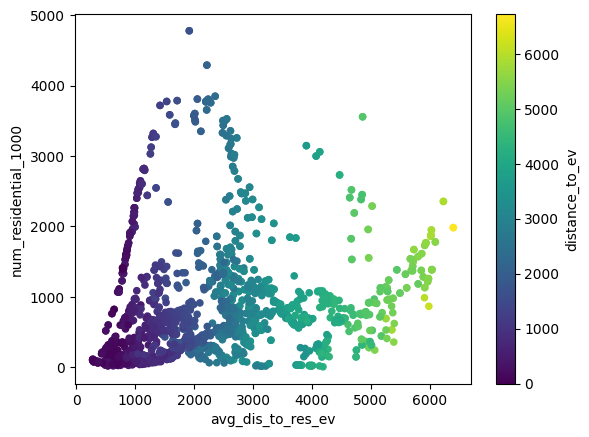

In [182]:
pd.DataFrame(buildings).plot.scatter(x='avg_dis_to_res_ev', y='num_residential_1000', c='distance_to_ev')

<Axes: xlabel='distance_to_ev', ylabel='avg_dis_to_res_ev'>

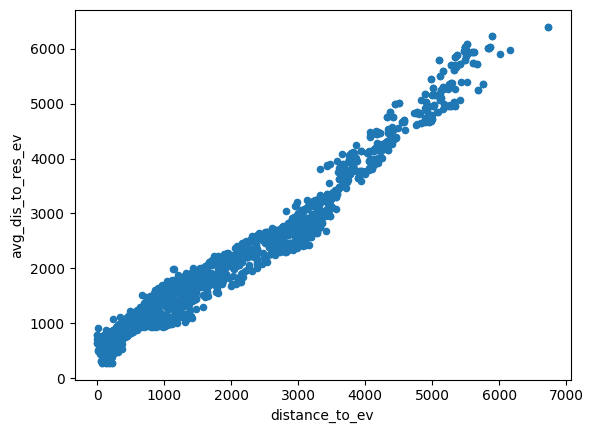

In [183]:
pd.DataFrame(buildings).plot.scatter(x='distance_to_ev', y='avg_dis_to_res_ev')

In [187]:
buildings['num_residential_1000_scaled']=(buildings['num_residential_1000']-buildings['num_residential_1000'].min())/(buildings['num_residential_1000'].max()-buildings['num_residential_1000'].min())

buildings['avg_dis_to_res_ev_scaled']=(buildings['avg_dis_to_res_ev']-buildings['avg_dis_to_res_ev'].min())/(buildings['avg_dis_to_res_ev'].max()-buildings['avg_dis_to_res_ev'].min())


<Axes: xlabel='avg_dis_to_res_ev_scaled', ylabel='num_residential_1000_scaled'>

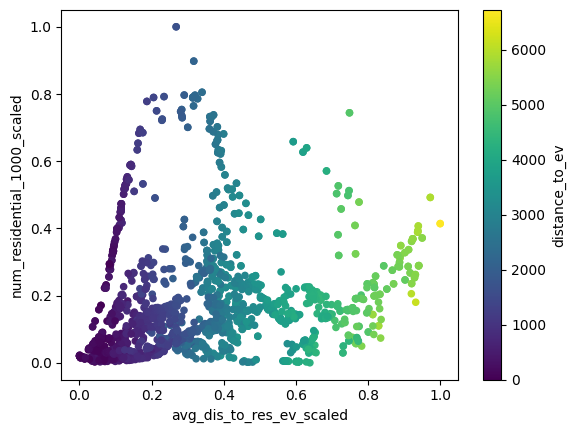

In [189]:
buildings['buildings_ev_index'] = (buildings['num_residential_1000_scaled']**2+buildings['avg_dis_to_res_ev_scaled']**2)**0.5

In [198]:
buildings['buildings_ev_index_2'] = buildings['num_residential_1000_scaled']*buildings['avg_dis_to_res_ev_scaled']

<Axes: xlabel='avg_dis_to_res_ev', ylabel='num_residential_1000'>

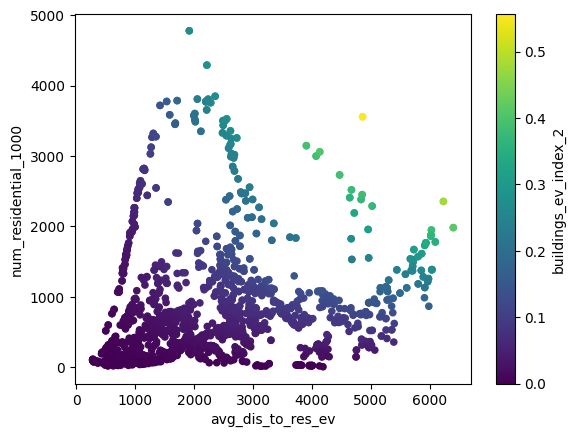

In [199]:
pd.DataFrame(buildings).plot.scatter(x='avg_dis_to_res_ev', y='num_residential_1000', c='buildings_ev_index_2')

In [191]:
buildings


,OBJECTID,FTR_CODE,DESCRIPTION,SUBTYPE,IMPERVIOUS,UPDATE_DATE,GLOBALID,Shape__Area,Shape__Length,geometry,...,elec_nema520_count,elec_tesla_count,GlobalID,Delete_feat,distance_to_ev,num_residential_1000,avg_dis_to_res_ev,num_residential_1000_scaled,avg_dis_to_res_ev_scaled,buildings_ev_index
0,5163,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,7a118862-8865-45c8-9b21-610d8e1d65b2,2348.067871,225.867831,"POLYGON ((-78.64936 35.77951, -78.64937 35.779...",...,0.0,0.0,0f0481ea-d284-47b7-91a3-243fc5594878,No,963.263413,NaN,NaN,NaN,NaN,NaN
1,5165,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,fa71ec8e-867c-43e3-8b48-83daa1ace5a1,448.301758,84.846519,"POLYGON ((-78.64968 35.77954, -78.64969 35.779...",...,0.0,0.0,0f0481ea-d284-47b7-91a3-243fc5594878,No,1014.672033,NaN,NaN,NaN,NaN,NaN
2,5173,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,f8a3d2e6-2b3c-48f6-aa45-5248406c4258,2190.648682,207.681274,"POLYGON ((-78.64929 35.78245, -78.64929 35.782...",...,0.0,0.0,0f0481ea-d284-47b7-91a3-243fc5594878,No,1208.090359,NaN,NaN,NaN,NaN,NaN
3,5175,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,760ead15-1e35-40a3-b4f2-e3c5d980d5e6,1630.767822,168.688529,"POLYGON ((-78.64882 35.78256, -78.64882 35.782...",...,0.0,0.0,0f0481ea-d284-47b7-91a3-243fc5594878,No,1168.863811,NaN,NaN,NaN,NaN,NaN
4,5176,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,e0e0cea5-fe94-4ee9-9519-fd1aab1c6710,1565.047852,165.952287,"POLYGON ((-78.64914 35.78461, -78.64914 35.784...",...,NaN,NaN,40784474-e1a4-4631-8d84-4bae07519cf1,No,1291.824887,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18623,177755,5,RESIDENTIAL,N/A,YES,2017-02-13 00:00:00+00:00,158a51a3-5bdc-4464-80a1-c0816e74f33c,406.511475,87.189014,"POLYGON ((-78.63216 35.79621, -78.63221 35.796...",...,NaN,NaN,40784474-e1a4-4631-8d84-4bae07519cf1,No,2899.295408,NaN,NaN,NaN,NaN,NaN
18624,177797,5,RESIDENTIAL,N/A,YES,2022-02-19 00:00:00+00:00,a8ff3ae8-7f9c-4376-8b7a-c27ca1a4a084,3826.957153,269.709837,"POLYGON ((-78.64842 35.79949, -78.64841 35.799...",...,NaN,NaN,40784474-e1a4-4631-8d84-4bae07519cf1,No,3366.344229,NaN,NaN,NaN,NaN,NaN
18625,178398,5,RESIDENTIAL,N/A,YES,2022-02-19 00:00:00+00:00,52cce51d-f8f9-4d3b-97b3-a2ee6053284d,116.925293,44.106763,"POLYGON ((-78.64827 35.79953, -78.64830 35.799...",...,NaN,NaN,40784474-e1a4-4631-8d84-4bae07519cf1,No,3383.564132,NaN,NaN,NaN,NaN,NaN
18626,178440,5,RESIDENTIAL,N/A,YES,2022-02-19 00:00:00+00:00,9bb51e85-dc48-4a20-ba79-37535baffc2b,980.017822,131.102943,"POLYGON ((-78.64821 35.79924, -78.64829 35.799...",...,NaN,NaN,40784474-e1a4-4631-8d84-4bae07519cf1,No,3329.509410,NaN,NaN,NaN,NaN,NaN
